# Test Cases for Transient Analysis

In [1]:
from CircuitCalculator.Circuit.state_space_model import state_space_model
from CircuitCalculator.Circuit.circuit import Circuit
from CircuitCalculator.Circuit import components as cmp
from CircuitCalculator.Network import elements as elm
from CircuitCalculator.Network.network import Network, Branch
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

## Test Case 1 - Single Capacitor

In [2]:
G1, G2, G3 = 10, 20, 30
R1, R2, R3 = 1/G1, 1/G2, 1/G3
R1, R2, R3 = 10, 20, 30
G1, G2, G3 = 1/R1, 1/R2, 1/R3
RC = 40e6
C = 1e-3
V0 = 5
circuit = Circuit([
    cmp.dc_voltage_source(id='Uq', V=V0, nodes=('1', '0')),
    cmp.resistor(id='R1', R=R1, nodes=('1', '2')),
    cmp.resistor(id='R2', R=R2, nodes=('2', '0')),
    cmp.resistor(id='R3', R=R3, nodes=('2', '3')),
    cmp.capacitor(id='C', C=C, nodes=('3', '0')),
    cmp.ground(nodes=('0',))
])

### Setup Solution

In [3]:
def step(t: np.ndarray) -> np.ndarray:
    return np.heaviside(t, 1)

In [4]:
t_max = 0.3
t0 = 0.1
Ts = 0.0003
t = np.arange(0, t_max, Ts)
V = V0*step(t-t0)

### Calculate Solution

In [5]:
ss = state_space_model(circuit=circuit, potential_nodes=['1', '2', '3'], voltage_ids=['Uq', 'R1', 'R2', 'R3', 'C'], current_ids=['R1', 'R2', 'R3', 'C'])
sys = signal.StateSpace(ss.A, ss.B, ss.C, ss.D)
tout, yout, out = signal.lsim(sys, V, t)

### Calculate Reference Solution

In [6]:
def pll(R1, R2):
    return R1*R2/(R1+R2)

Ri = pll(pll(R1, R2)+R3, RC)
tau = Ri*C
u2_ref = V*R2/(R1+R2)*(1+(R3*C/tau-1)*(np.exp(-(tout-t0)/tau)))
uc_ref = V*R2/(R1+R2)*(1-np.exp(-(tout-t0)/tau))
u3_ref = u2_ref - uc_ref
u1_ref = V - u2_ref

i1_ref = u1_ref/R1
i2_ref = u2_ref/R2
i3_ref = u3_ref/R3
ic_ref = C*V*R2/(R1+R2)/tau*np.exp(-(tout-t0)/tau)

### Plot Solution

(0.0, 0.3)

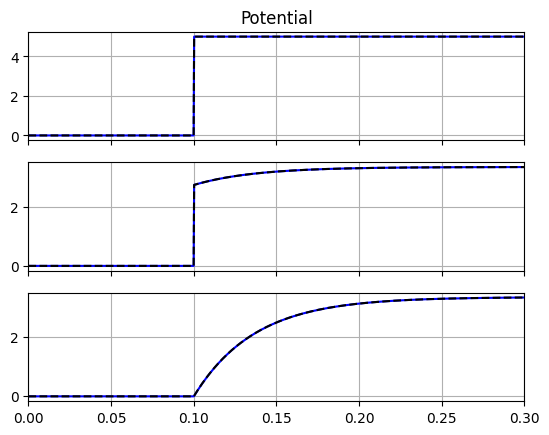

In [7]:
_, ax = plt.subplots(nrows=3, sharex=True)
ax[0].plot(tout, yout[:,0], 'b-')
ax[0].plot(t, V, 'k--')
ax[0].grid(True)
ax[0].set_title('Potential')

ax[1].plot(tout, yout[:,1], 'b-')
ax[1].plot(tout, u2_ref, 'k--')
ax[1].grid(True)

ax[2].plot(tout, yout[:,2], 'b-')
ax[2].plot(tout, uc_ref, 'k--')
ax[2].grid(True)
ax[2].set_xlim((0, t_max))

(0.0, 0.3)

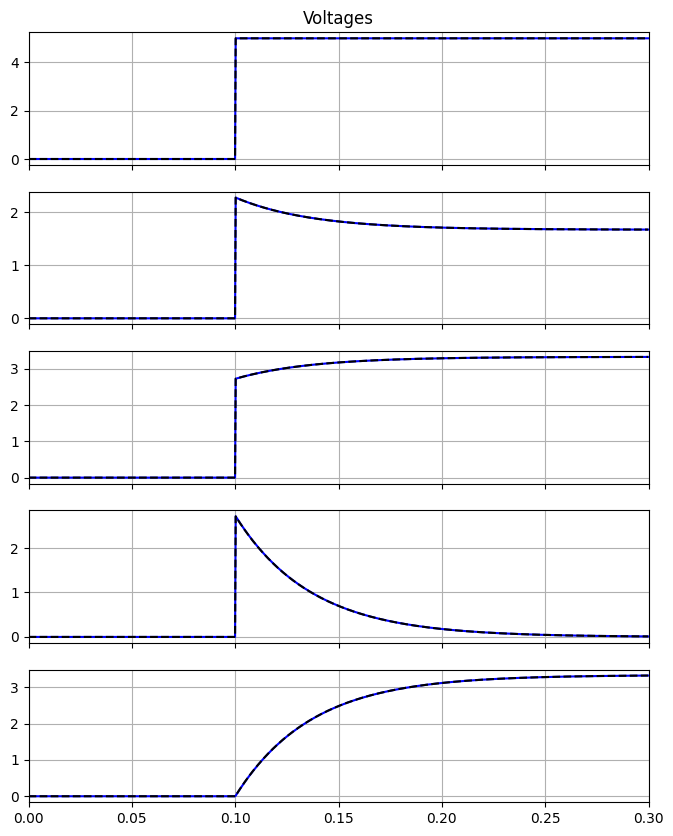

In [8]:
_, ax = plt.subplots(nrows=5, sharex=True, figsize=(8, 10))
ax[0].plot(tout, yout[:,3], 'b-')
ax[0].plot(t, V, 'k--')
ax[0].grid(True)
ax[0].set_title('Voltages')

ax[1].plot(tout, yout[:,4], 'b-')
ax[1].plot(tout, u1_ref, 'k--')
ax[1].grid(True)

ax[2].plot(tout, yout[:,5], 'b-')
ax[2].plot(tout, u2_ref, 'k--')
ax[2].grid(True)

ax[3].plot(tout, yout[:,6], 'b-')
ax[3].plot(tout, u3_ref, 'k--')
ax[3].grid(True)

ax[4].plot(tout, yout[:,7], 'b-')
ax[4].plot(tout, uc_ref, 'k--')
ax[4].grid(True)
ax[4].set_xlim((0, t_max))

(0.0, 0.3)

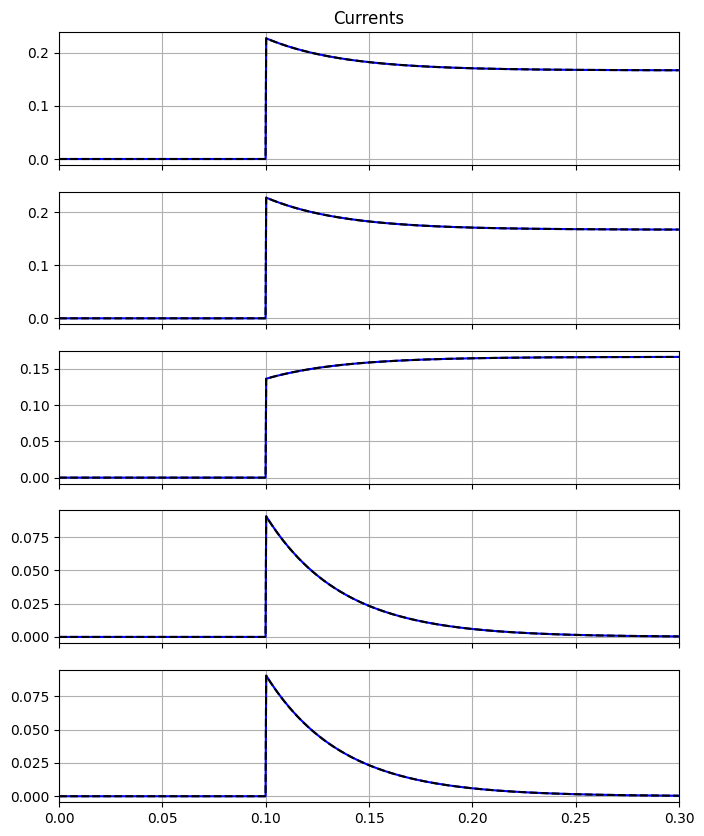

In [9]:
_, ax = plt.subplots(nrows=5, sharex=True, figsize=(8, 10))
ax[0].plot(tout, yout[:,8], 'b-')
ax[0].plot(t, i1_ref, 'k--')
ax[0].grid(True)
ax[0].set_title('Currents')

ax[1].plot(tout, yout[:,8], 'b-')
ax[1].plot(tout, i1_ref, 'k--')
ax[1].grid(True)

ax[2].plot(tout, yout[:,9], 'b-')
ax[2].plot(tout, i2_ref, 'k--')
ax[2].grid(True)

ax[3].plot(tout, yout[:,10], 'b-')
ax[3].plot(tout, i3_ref, 'k--')
ax[3].grid(True)

ax[4].plot(tout, yout[:,11], 'b-')
ax[4].plot(tout, ic_ref, 'k--')
ax[4].grid(True)
ax[4].set_xlim((0, t_max))

## Test Case 2 - Voltage and Current Source

In [10]:
R1, R2 = 10, 20
G1, G2 = 1/R1, 1/R2
RC = 40e6
C = 1e-3
V0 = 5
I0 = -0.1
circuit = Circuit([
    cmp.dc_voltage_source(id='Uq', V=V0, nodes=('1', '0')),
    cmp.resistor(id='R1', R=R1, nodes=('1', '2')),
    cmp.capacitor(id='C', C=C, nodes=('2', '3')),
    cmp.resistor(id='R2', R=R2, nodes=('3', '0')),
    cmp.dc_current_source(id='Iq', I=I0, nodes=('0', '3')),
    cmp.ground(nodes=('0',))
])

### Setup Solution

In [11]:
t_max = 0.3
t0 = 0.1
t1 = 0.2
Ts = 0.0003
t = np.arange(0, t_max, Ts)
V = V0*step(t-t0)
I = I0*step(t-t1)

### Calculate Solution

In [12]:
ss = state_space_model(circuit=circuit, potential_nodes=['1', '2', '3'], voltage_ids=['Uq', 'R1', 'R2', 'C'], current_ids=['R1', 'R2', 'C', 'Iq'])
sys = signal.StateSpace(ss.A, ss.B, ss.C, ss.D)
tout, yout, xout = signal.lsim(sys, np.column_stack([I, V]), t)

### Calculate Reference

In [13]:
Ri = R1+R2
tau = Ri*C

uc_ref = np.zeros(t.size)
uc_ref[t>t0] = V0*(1-np.exp(-(tout[t>t0]-t0)/tau))
uc_ref[t>t1] = uc_ref[t>t1] - I0*R2*(1-np.exp(-(tout[t>t1]-t1)/tau))

ic_ref = np.zeros(t.size)
ic_ref[t>t0] = C*V0*(-np.exp(-(tout[t>0.1]-0.1)/tau))*(-1/tau)
ic_ref[t>t1] = ic_ref[t>t1] - C*I0*R2*(-np.exp(-(tout[t>t1]-t1)/tau))*(-1/tau)

phi1_ref = -ic_ref*R1 + V
phi2_ref = (ic_ref + I)*R2

u1_ref = V - phi1_ref
u2_ref = phi2_ref

i1_ref = u1_ref/R1
i2_ref = u2_ref/R2

### Plot Solution

(0.0, 0.3)

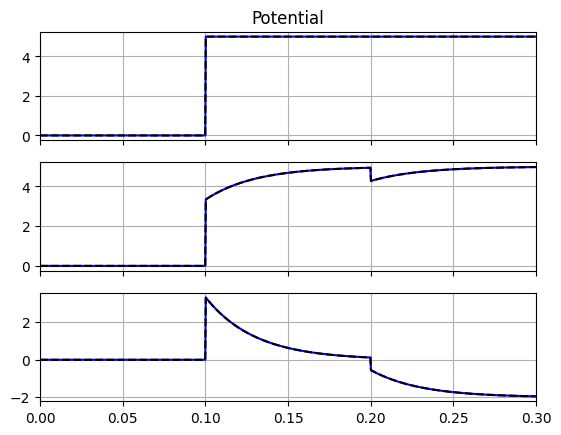

In [14]:
_, ax = plt.subplots(nrows=3, sharex=True)
ax[0].plot(tout, yout[:,0], 'b-')
ax[0].plot(t, V, 'k--')
ax[0].grid(True)
ax[0].set_title('Potential')

ax[1].plot(tout, yout[:,1], 'b-')
ax[1].plot(tout, phi1_ref, 'k--')
ax[1].grid(True)

ax[2].plot(tout, yout[:,2], 'b-')
ax[2].plot(tout, phi2_ref, 'k--')
ax[2].grid(True)
ax[2].set_xlim((0, t_max))

(0.0, 0.3)

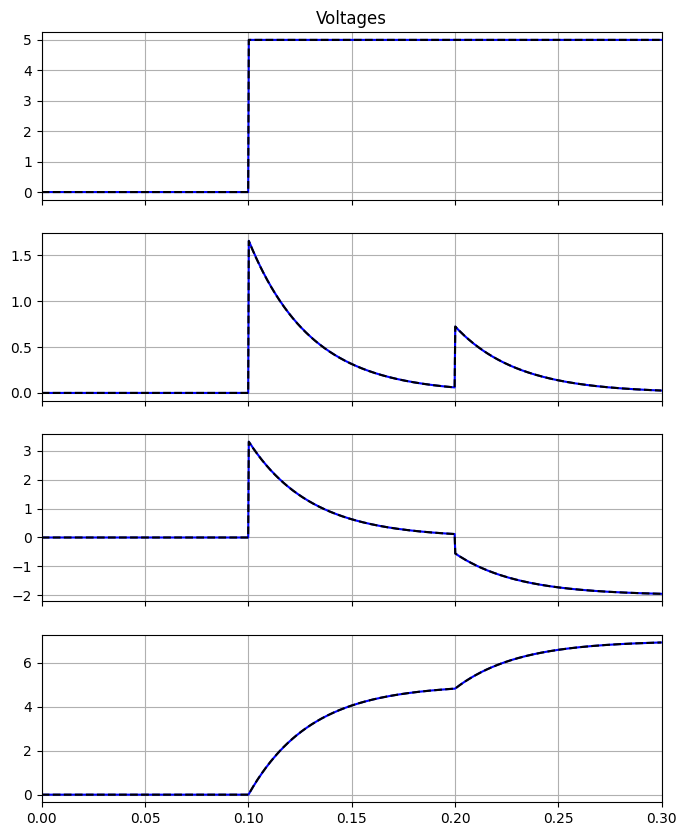

In [15]:
_, ax = plt.subplots(nrows=4, sharex=True, figsize=(8, 10))
ax[0].plot(tout, yout[:,3], 'b-')
ax[0].plot(t, V, 'k--')
ax[0].grid(True)
ax[0].set_title('Voltages')

ax[1].plot(tout, yout[:,4], 'b-')
ax[1].plot(tout, u1_ref, 'k--')
ax[1].grid(True)

ax[2].plot(tout, yout[:,5], 'b-')
ax[2].plot(tout, u2_ref, 'k--')
ax[2].grid(True)

ax[3].plot(tout, yout[:,6], 'b-')
ax[3].plot(tout, uc_ref, 'k--')
ax[3].grid(True)
ax[3].set_xlim((0, t_max))

(0.0, 0.3)

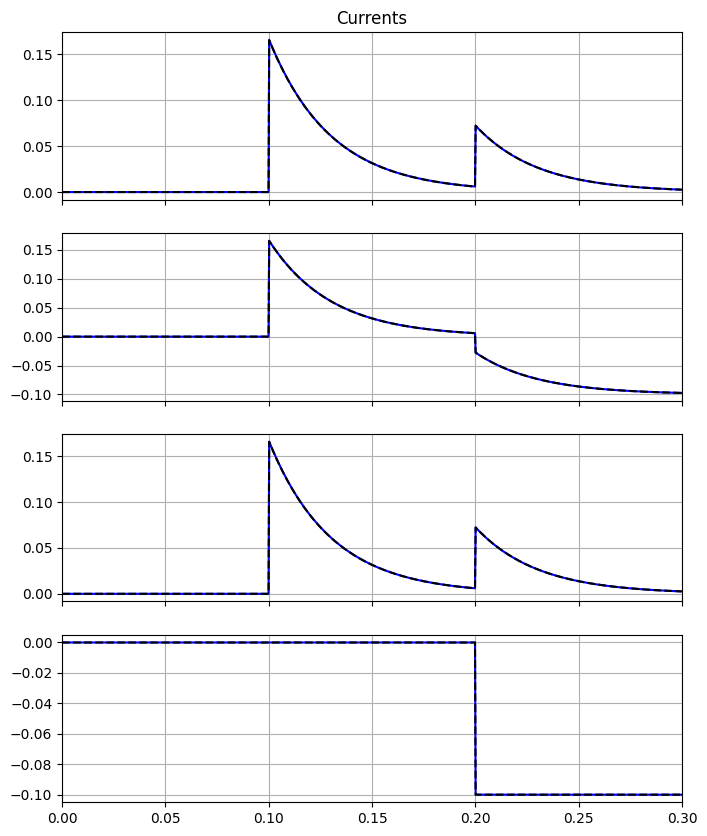

In [16]:
_, ax = plt.subplots(nrows=4, sharex=True, figsize=(8, 10))
ax[0].plot(tout, yout[:,7], 'b-')
ax[0].plot(t, i1_ref, 'k--')
ax[0].grid(True)
ax[0].set_title('Currents')

ax[1].plot(tout, yout[:,8], 'b-')
ax[1].plot(tout, i2_ref, 'k--')
ax[1].grid(True)

ax[2].plot(tout, yout[:,9], 'b-')
ax[2].plot(tout, ic_ref, 'k--')
ax[2].grid(True)

ax[3].plot(tout, yout[:,10], 'b-')
ax[3].plot(tout, I, 'k--')
ax[3].grid(True)
ax[3].set_xlim((0, t_max))

## Test Case 3 - Two Capacitors

In [17]:
V0 = 1
R1, R2 = 10, 20
RC = 40e6
C1 = 5e-3
C2 = 1e-3
circuit = Circuit([
    cmp.dc_voltage_source(id='Uq', V=V0, nodes=('1', '0')),
    cmp.resistor(id='R1', R=R1, nodes=('1', '2')),
    cmp.capacitor(id='C1', C=C1, nodes=('2', '3')),
    cmp.resistor(id='R2', R=R2, nodes=('3', '0')),
    cmp.capacitor(id='C2', C=C2, nodes=('3', '0')),
    cmp.ground(nodes=('0',))
])

### Setup Solution

In [18]:
t_max = 0.5
t0 = 0.1
Ts = 0.0003
t = np.arange(0, t_max, Ts)
V = V0*step(t-t0)

### Calculate Solution

In [19]:
ss = state_space_model(circuit=circuit, potential_nodes=['1', '2', '3'], voltage_ids=['Uq', 'R1', 'R2', 'C1', 'C2'], current_ids=['R1', 'R2', 'C1', 'C2'])
sys = signal.StateSpace(ss.A, ss.B, ss.C, ss.D)
tout, yout, xout = signal.lsim(sys, V, t)

### Calculate Reference

In [20]:
def quad_equation(a, b, c):
    D = np.sqrt(b**2-4*a*c)
    return ((-b+D)/2/a, (-b-D)/2/a)

a = C2*R2
b = C1*R1
c = C1*R2
s1, s2 = quad_equation(1, (a+b+c)/a/b, 1/a/b)
s3, s4 = quad_equation(1, (a+b+c)/a/b, 1/a/b)

t_ref = tout[t>t0]-t0

uc1_ref = np.zeros(t.size)
uc1_ref[t>t0] = V0/a/b * (1/s1/s2 + 1/(s2-s1)*(-1/s1*np.exp(s1*t_ref)+1/s2*np.exp(s2*t_ref))) + V0/b * 1/(s1-s2) * (np.exp(s1*t_ref)-np.exp(s2*t_ref))

uc2_ref = np.zeros(t.size)
uc2_ref[t>t0] = V0*c/a/b * (np.exp(s3*t_ref)-np.exp(s4*t_ref))/(s3-s4)

phi1_ref = uc1_ref + uc2_ref
phi2_ref = uc2_ref

u1_ref = V - phi1_ref
u2_ref = uc2_ref

i1_ref = u1_ref/R1
i2_ref = u2_ref/R2

ic1_ref = np.zeros(t.size)
ic1_ref[t>t0] = C1*V0/a/b * (1/(s2-s1)*(-np.exp(s1*t_ref)+np.exp(s2*t_ref))) + C1*V0/b * 1/(s1-s2) * (np.exp(s1*t_ref)*s1-np.exp(s2*t_ref)*s2)

ic2_ref = np.zeros(t.size)
ic2_ref[t>t0] = C2*V0*c/a/b * (np.exp(s3*t_ref)*s3-np.exp(s4*t_ref)*s4)/(s3-s4)

### Plot Solution

(0.0, 0.5)

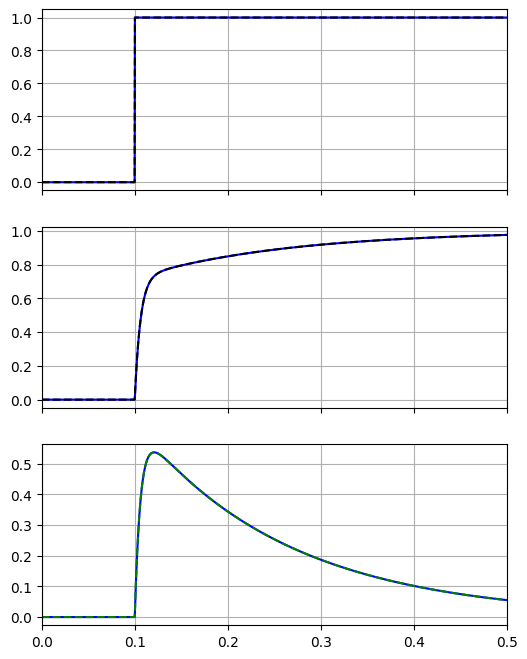

In [21]:
_, ax = plt.subplots(nrows=3, sharex=True, figsize=(6, 8))
ax[0].plot(tout, yout[:,0], 'b-')
ax[0].plot(tout, V, 'k--')
ax[0].grid(True)

ax[1].plot(tout, yout[:,1], 'b-')
ax[1].plot(tout, phi1_ref, 'k--')
ax[1].grid(True)

ax[2].plot(tout, yout[:,2], 'b-')
ax[2].plot(tout, phi2_ref, 'g--')
ax[2].grid(True)
ax[2].set_xlim((0, t_max))

(0.0, 0.5)

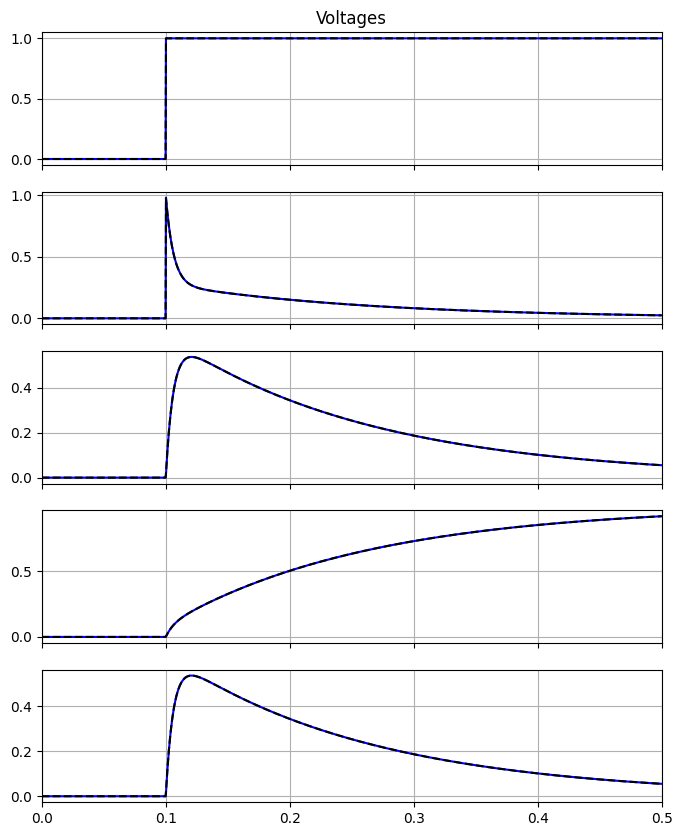

In [22]:
_, ax = plt.subplots(nrows=5, sharex=True, figsize=(8, 10))
ax[0].plot(tout, yout[:,3], 'b-')
ax[0].plot(t, V, 'k--')
ax[0].grid(True)
ax[0].set_title('Voltages')

ax[1].plot(tout, yout[:,4], 'b-')
ax[1].plot(tout, u1_ref, 'k--')
ax[1].grid(True)

ax[2].plot(tout, yout[:,5], 'b-')
ax[2].plot(tout, u2_ref, 'k--')
ax[2].grid(True)

ax[3].plot(tout, yout[:,6], 'b-')
ax[3].plot(tout, uc1_ref, 'k--')
ax[3].grid(True)

ax[4].plot(tout, yout[:,7], 'b-')
ax[4].plot(tout, uc2_ref, 'k--')
ax[4].grid(True)
ax[4].set_xlim((0, t_max))

(0.0, 0.5)

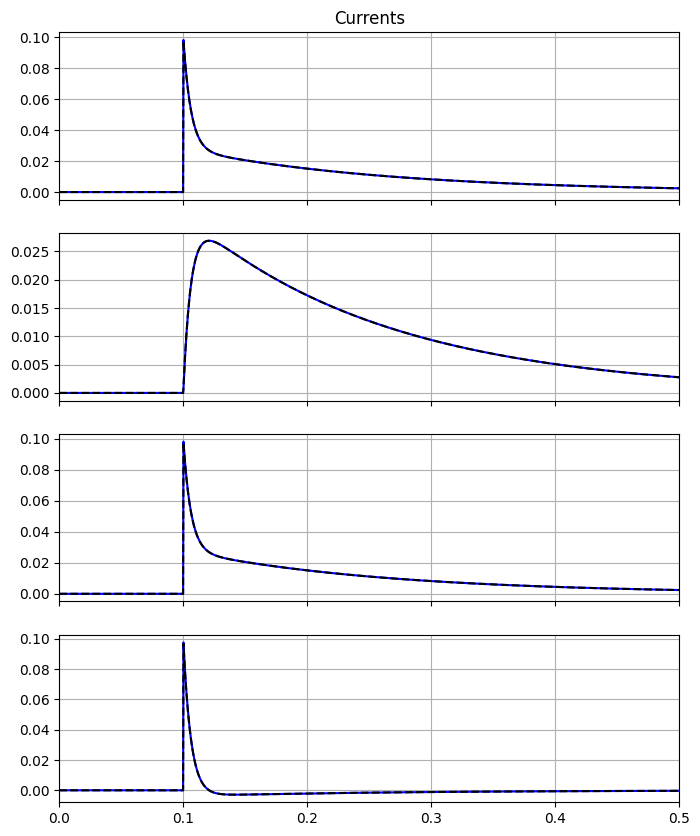

In [23]:
_, ax = plt.subplots(nrows=4, sharex=True, figsize=(8, 10))
ax[0].plot(tout, yout[:,8], 'b-')
ax[0].plot(t, i1_ref, 'k--')
ax[0].grid(True)
ax[0].set_title('Currents')

ax[1].plot(tout, yout[:,9], 'b-')
ax[1].plot(tout, i2_ref, 'k--')
ax[1].grid(True)

ax[2].plot(tout, yout[:,10], 'b-')
ax[2].plot(tout, ic1_ref, 'k--')
ax[2].grid(True)

ax[3].plot(tout, yout[:,11], 'b-')
ax[3].plot(tout, ic2_ref, 'k--')
ax[3].grid(True)
ax[3].set_xlim((0, t_max))